(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. We will also analyze the creation dates of questions.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/datascience16/lectures/blob/master/Lecture2/Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve the questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [37]:
import requests

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [2]:
print (response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":157,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":196,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":220,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [3]:
import json

print (json.dumps(response.json(), indent=2))


{
  "items": [
    {
      "owner": {
        "display_name": "salep",
        "accept_rate": 78,
        "reputation": 157,
        "user_id": 3210431,
        "user_type": "registered",
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "link": "http://stackoverflow.com/users/3210431/salep"
      },
      "view_count": 196,
      "last_activity_date": 1420071815,
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "creation_date": 1420070458,
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "is_answered": true,
      "title": "Inserting multiple records into MySQL from an array",
      "answer_count": 2,
      "question_id": 27727385,
      "accepted_answer_id": 27727478,
      "score": 0
    },
    {
      "owner": {
        "display_name": "Balpreet Pankaj",
        "link": "http://stackoverflow.com/users/868779/balpreet-pankaj",
       

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [4]:
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    theJson = response.json()
    theJson_creation_date = [theJson["items"][i]["creation_date"] for i in range(100)]
    # The next line converts the Unix time to normal time, if needed!
    # creation_time = [time.ctime(int(theJson["items"][i]["creation_date"])) for i in range(100)]
    return theJson_creation_date

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [5]:
print_creation_dates_json(response)


[1420070458,
 1420070503,
 1420070552,
 1420070577,
 1420070611,
 1420070641,
 1420070703,
 1420070727,
 1420070734,
 1420070777,
 1420070801,
 1420070848,
 1420070859,
 1420070866,
 1420070968,
 1420071005,
 1420071029,
 1420071103,
 1420071122,
 1420071175,
 1420071184,
 1420071212,
 1420071230,
 1420071340,
 1420071431,
 1420071530,
 1420071736,
 1420071794,
 1420071830,
 1420071868,
 1420071907,
 1420071929,
 1420071939,
 1420072002,
 1420072021,
 1420072074,
 1420072129,
 1420072243,
 1420072342,
 1420072354,
 1420072397,
 1420072430,
 1420072455,
 1420072481,
 1420072610,
 1420072638,
 1420072667,
 1420072685,
 1420072777,
 1420072779,
 1420072902,
 1420072924,
 1420072976,
 1420072979,
 1420072997,
 1420073055,
 1420073169,
 1420073273,
 1420073276,
 1420073352,
 1420073383,
 1420073425,
 1420073455,
 1420073456,
 1420073492,
 1420073510,
 1420073524,
 1420073787,
 1420073851,
 1420073932,
 1420074037,
 1420074057,
 1420074085,
 1420074170,
 1420074204,
 1420074224,
 1420074226,

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/kzhao/teaching/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that this file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may also want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on this file, you will get a `MemoryError`.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv`. **(10 pts)**

In [1]:
# -*- coding: utf-8 -*-
from string import punctuation
import re
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

def tagging(x):
    x = str(x)
    z = len(str(x.split(sep='lt')))
    if z > 1:
        if len(str(x).split(sep="lt")[1]) > 3:
            y = x.split(sep='lt')[1][:-2]
        else:
            y = x
    else:
        y = x
    return y


def clean_questions(loc):
    output = open("question_dataframe.csv",'w')
    output.write("ID,CreationDate,OwnerUserId,Tags\n")
    with open(loc,"r",buffering=2000000) as f:
        try:
            for line in f:
                #print(line)
                if """ PostTypeId="1" """ in line:
                    y = line.split()
                    ID, CreationDate, OwnerUserId, Tags = "NA","NA","NA","NA"
                    for word in y:
                        if re.match(r'^Id=',word):
                            ID = strip_punctuation(word[3:])
                            #print(ID)
                        if re.match(r'CreationDate',word):
                            CreationDate = strip_punctuation(word[13:])
                        if re.match(r'OwnerUserId',word):
                            OwnerUserId = strip_punctuation(word[12:])
                        if re.match(r'Tags',word):
                            Tags = strip_punctuation(word[5:])
                            

                    try:
                        if len(str(ID)) == 8:
                            Tags = tagging(Tags)
                            output.write(str(ID) + "," + str(CreationDate) + "," + str(OwnerUserId) + "," + str(Tags)+"\n")
                    except:
                        pass
                    
        except UnicodeDecodeError:
            pass

    output.close()
    

#clean_questions("stackoverflow-posts-2015.xml")

In [2]:
import pandas
import numpy as np
#load data
question_df = pandas.read_csv('question_dataframe.csv',sep=',')
#Cleaning Data
### Make Sure the IDs are all integer
def cleaning_ID(x):
    try:
        y = int(x)
    
    except:
        y = np.nan
    return y


question_df.ID = question_df.ID.apply(lambda d: cleaning_ID(d))
question_df = question_df.dropna()
question_df.reset_index(drop=True) 
###
#Clean Tags
def cleaning_tags(x):
    x = str(x)
    if x.startswith('lt'):
        x = "c"
    else:
        x = x
    return x
question_df.Tags = question_df.Tags.apply(lambda d: cleaning_tags(d))

question_df


C:\Users\Shobeir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,CreationDate,OwnerUserId,Tags
0,27727385,20150101T000058253,3210431,php
1,27727388,20150101T000143673,868779,apachepig
2,27727391,20150101T000232123,4372672,ios
3,27727393,20150101T000257983,2482149,sqlserver
4,27727394,20150101T000331337,4263870,php
5,27727396,20150101T000401407,4409381,android
6,27727406,20150101T000503773,875317,c
7,27727407,20150101T000527167,821742,java
8,27727408,20150101T000534733,2595033,c
9,27727409,20150101T000617720,1815395,apache


-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 1000 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize the questions by looking at the first tag in each question. You may choose to implement any one of the similarity/distance measures we discussed in class. Document your findings. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction module](http://scikit-learn.org/stable/modules/feature_extraction.html) helpful.

In [20]:
# -*- coding: utf-8 -*-

### Imports # settings
import pandas
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
import re
from string import punctuation
import operator
%matplotlib inline
### Getting and Cleaning Data

### Functions

# Function to get rid of the punctuations.
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

# Function to make a subset of our XML data that only contains the answers (PostTypeId = 2) and writes it into a CSV file
# Note that the prints that are commented out are for debugging purposes.  
def clean_answers(loc):
    output = open("answers_dataframe.csv",'w')
    output.write("ID,CreationDate,OwnerUserId,ParentId\n")
    with open(loc,"r",buffering=2000000) as f: #reads the file in 2Mb portions
        try: # Handles the cases in which there is a none utf8 character in the solutions.
            for line in f:
                #print(line)
                if """ PostTypeId="2" """ in line:
                    y = line.split()
                    #print(y)
                    ID, CreationDate, OwnerUserId, ParentId = "NA","NA","NA","NA"
                    for word in y:
                        #print(word)
                        if re.match(r'^Id=',word):
                            ID = strip_punctuation(word[3:])
                            #print(ID)
                        if re.match(r'CreationDate',word):
                            CreationDate = strip_punctuation(word[13:])
                        if re.match(r'OwnerUserId',word):
                            OwnerUserId = strip_punctuation(word[12:])
                        if re.match(r'ParentId',word):
                            ParentId = strip_punctuation(word[9:])
                            

                    try: # Ensures that there is 8 numbers in the ID before write it into the file
                        if len(str(ID)) == 8:
                            #Print(ID, CreationDate, OwnerUserId, ParentId)
                            output.write(str(ID) + "," + str(CreationDate) + "," + str(OwnerUserId) + "," + str(ParentId)+"\n")
                    except:
                        pass
                    
        except UnicodeDecodeError:
            pass

    output.close()
    
#clean_answers("stackoverflow-posts-2015.xml")
### Read the answers subset into a pandas DataFrame
answers_df = pandas.read_csv('answers_dataframe.csv',sep=',')
#Cleaning Data
### Function that ensures the IDs are all integer
def cleaning_ID(x):
    try:
        y = int(x)
    
    except:
        y = np.nan
    return y

### Ensuring that all the IDs are integer.
answers_df.ParentId = answers_df.ParentId.apply(lambda d: cleaning_ID(d))
answers_df = answers_df.dropna()
answers_df.reset_index(drop=True) 

### Selecting only the ID and the Tags from the question_df (to be merged with the answers_df)
right_df = question_df[['ID','Tags']]
#right_df
# merge the two data sets based on the questions (in order to get the right tags attached to the right answer)
final_df = pandas.merge(left = answers_df,right = right_df,left_on='ParentId',right_on='ID',how='left')
final_df = final_df.dropna()
final_df.reset_index(drop=True) 
final_df = final_df[['ID_x','CreationDate','OwnerUserId','Tags']]
final_df

C:\Users\Shobeir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_x,CreationDate,OwnerUserId,Tags
17,27727421,20150101T000823017,871026,java
21,27727426,20150101T000939090,3113558,html
22,27727428,20150101T001012253,541091,mysql
25,27727432,20150101T001100003,6216,php
26,27727436,20150101T001215250,3076534,php
38,27727456,20150101T001603653,3379653,ios
40,27727460,20150101T001722803,1445366,ios
42,27727462,20150101T001741780,2227834,c
45,27727466,20150101T002009970,2085504,ios
52,27727478,20150101T002335983,1491895,php


In [21]:
# in this section we find the top 1000 Users
counter_dict = {}

for i in range(final_df.shape[0]):
    OwnerUserId = final_df.OwnerUserId.iat[i]
    if OwnerUserId in counter_dict:
        counter_dict[OwnerUserId] += 1
    else:
        counter_dict[OwnerUserId] = 1


        
t = sorted(counter_dict.items(), key=operator.itemgetter(1),reverse=True)[0:1000]
top_1000_Users = [t[n][0] for n in range(1000)]
# subset the top 1000 Users
result = final_df[final_df.OwnerUserId.isin(top_1000_Users)]
#print("Comparing two datasets:","Dimensions of top 1000 Useras:",result.shape,"initial dataset:",final_df.shape)

### List of tags
list_tags = []
for i in range(result.shape[0]):
    Tags = result.Tags.iat[i]
    if Tags not in list_tags: 
        list_tags.append(Tags)
###
# Create dictionary of the desired values 
dict_group_result = dict(result.groupby(['OwnerUserId','Tags']).ID_x.count())
final_dict = {}
for user in top_1000_Users:
    for tags in list_tags:

        if user not in final_dict:
            final_dict[user] = {}
        if tags not in final_dict[user]:
            try: 
                final_dict[user][tags] = dict_group_result[user,tags]
            except KeyError:
                final_dict[user][tags] = 0

#Create the dataframe
        
df = pandas.DataFrame(final_dict).reset_index().rename(columns={"index": "Tags"})      
df = pandas.melt(df, "Tags", var_name="ID")
df = df.pivot_table('value', ['ID'], 'Tags')
# Create Distance Matrix
df_1 = df.as_matrix()
euclidean_dists = metrics.euclidean_distances(df_1)
print (euclidean_dists.shape)

(1000, 1000)


Let's plot a subset of the distance matrix. Order the pairwise distance in your distance matrix (excluding the entries along the diagonal) in increasing order and pick user pairs until you have 100 unique users. See [Lecture 3](https://github.com/datascience16/lectures/blob/master/Lecture3/Distance-Functions.ipynb) for examples. **(10 pts)**

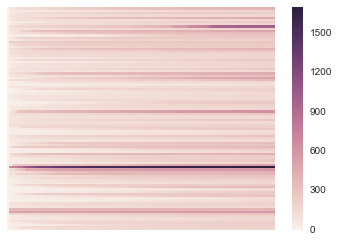

In [22]:
idx = np.array([n**2 - 1 for n in range(1,1001)])
euclidean_dists1 = np.delete(euclidean_dists,idx).reshape(1000,999)
sorted_dist = np.sort(euclidean_dists1)
sns.heatmap(sorted_dist[0:100,0:100], xticklabels=False, yticklabels=False, linewidths=0, square=False, cbar=True)


Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the `CreationDate` of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. **(30 pts)**

You may find the [pandas.DataFrame.resample module](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) helpful.

In [23]:
counter_dict_q = {}

for i in range(question_df.shape[0]):
    OwnerUserId = question_df.OwnerUserId.iat[i]
    if OwnerUserId in counter_dict_q:
        counter_dict_q[OwnerUserId] += 1
    else:
        counter_dict_q[OwnerUserId] = 1

       
t = sorted(counter_dict.items(), key=operator.itemgetter(1),reverse=True)[0:1000]
top_100_Users_questions = [t[n][0] for n in range(1000)]
top_100_Users_questions

question_df_final = question_df[question_df['OwnerUserId'].isin(top_100_Users_questions)]

In [134]:
import datetime
df = question_df_final.reset_index()
df['count'] = df.groupby(['CreationDate','OwnerUserId']).ID.transform(lambda x: x.count())
df['sum_Tags'] = df.groupby(['OwnerUserId','Tags'])['count'].transform(lambda x: sum(x))
df['sum_Users'] = df.groupby(['OwnerUserId'])['sum_Tags'].transform(lambda x: sum(x))

### the apply method can be used as well.
for row in range(df.shape[0]):
    df.CreationDate.iloc[row] = datetime.datetime.strptime(df.CreationDate.iat[row][:8], "%Y%m%d")

dfs=df.set_index('CreationDate')
dfs.head()

dfs_users = [dfs[dfs.OwnerUserId == n] for n in top_100_Users_questions]



C:\Users\Shobeir\Anaconda3\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


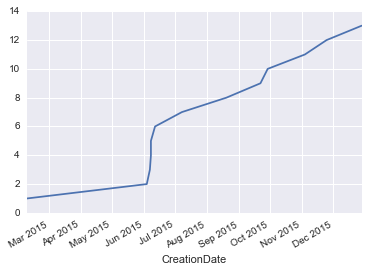

In [172]:
### Sample user timeseries
ts3 = dfs_users[3]['count']
ts3 = ts3.cumsum()

plt.figure();
ts3.plot()


Plot the 2 most similar and the 2 most different time series. **(10 pts)**

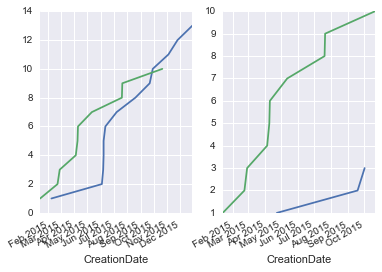

In [174]:
### Sample user timeseries
fig, axs = plt.subplots(1,2)

ts3 = dfs_users[3]['count']
ts3 = ts3.cumsum()
ts4 =dfs_users[100]['count']
ts4= ts4.cumsum()
ts5 =dfs_users[645]['count']
ts5= ts5.cumsum()
plt.figure();
ts3.plot(ax=axs[0])
ts5.plot(ax=axs[0])
ts4.plot(ax=axs[1])
ts5.plot(ax=axs[1])

In [1]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: '../theme/custom.css'